# 선형 회귀분석: 파이썬 실습

## 개요

선형 회귀분석(Linear Regression)은 둘 이상의 변수 사이에 존재하는 선형 상관관계를 분석하는 도구입니다.

이번 실습 시간에는 '**statsmodels**'라는 파이썬 패키지를 사용해서 선형 회귀분석 모형을 추정하고, 해석하고, 시각화해보고자 합니다.

첫 주에 화상수업에서 언급한 적이 있는 연구에서 사용한 데이터로 해당 논문의 관련 분석(OLS)을 replicate해볼 것입니다. [[AJR(2001)]](https://economics.mit.edu/files/4123).

논문은 연구자가 발견한 지식의 내용과 그 발견 과정을 상세하게 풀어쓴 결과물입니다. Acemoglu, Johnson, Robinson(3인)은 미국, 뉴질랜드처럼 잘 사는 나라는 왜 잘 사는지, 콩고처럼 못 사는 나라는 왜 못 사는지 궁금했고 (여러분들도 궁금하지 않나요?),


해당 논문의 저자인 Acemoglu, Johnson, Robinson(3인)은 한 국가가 경제성장을 이루는 과정에서 '**제도(institutions)**'의 영향이 크다는 점을 발견해냅니다.

사적 소유권이 법적으로 정치적으로 보호되는 국가일수록 인적 물적 자본에 대한 투자도 활발해져서 경제가 성장하지 않겠냐는 가설인데요.

첫 주에 화상수업 시간에 언급했듯이 겉으로 보기에는 간단한 가설 같지만, 이를 실증적으로 보여주려면 굉장히 어려운 작업이 됩니다.

첫 주에 진행한 화상수업에서 인과관계의 식별을 방해하는 요소로 (1) 제3의 요인 존재, (2) 우연일 가능성, (3) 역-인과관계(reverse causality) 가능성을 들었는데요.

한 국가의 '제도'에서 '경제성장'까지 이어지는 메커니즘 속에서 역-인과관계가 작용할 수 있습니다. 경제가 잘 굴러가니깐 제도도 잘 정착이 되는 식이죠. (민주주의 도입을 최대한 늦추기 위해 권위주의 국가의 지도자들이 내세우는 논리이기도 합니다. - 선 경제발전 후 민주주의)

그러나 [[AJR(2001)]](https://economics.mit.edu/files/4123)은 인과관계의 식별을 방해하는 수많은 요인을 적절하게 통제하여 지식을 발견해내는 데에 성공합니다.

Acemoglu, Johnson, Robinson(3인)은 식민지 경험이 있는 국가들로 연구 대상을 좁힙니다. 미국, 캐나다, 뉴질랜드$\cdots$ 콩고.

 식민지 경험을 통해서 한 국가가 갑자기 예상치 못한 제도의 변화를 겪는다는 점을 포착했고(일종의 식민지근대화론입니다.), 바로 그 시기를 시작점(Origins)으로 잡아서 인과관계를 살펴보기 시작합니다.

Acemoglu, Johnson, Robinson(3인)이 발견한 지식의 스토리는 이렇습니다.

"풍토병이 심해서 외지인이 정착하기 어려웠던 국가들은 유럽인들이 아예 착취에 전념하기로 작심하고 '수탈형' 식민지로 만들었던 반면에, 풍토병이 별로 없어서 외지인이 정착하기 쉬웠던 국가들은 유럽인들이 스스로 정착 후 생활을 영위하기 위해서 '발전형' 식민지로 만들었다. '수탈형' 제도가 도입된 국가들은 독립 이후에도 수탈형 제도의 상당 부분이 존속하였고 이후 경제발전에도 어려움을 겪었으며, 그 여파가 오늘날에까지 미치고 있다. 한편, '발전형' 제도가 도입된 국가들은 독립 이후에도 발전형 제도가 더욱 확립되었고 이후 경제발전에도 성과를 보여줄 수 있었다. 요컨대 오늘날 식민지 경험이 있는 국가들 중에서 일부는 잘 살고 일부는 못 사는 이유의 상당 부분은 바로 '**제도**'의 형태(발전형인지 수탈형인지)에 있다."

어떤가요? 그럴싸한 스토리죠?

사실 그럴싸한 스토리일수록 믿지 말고 의심해야 합니다.

데이터로 입증되지 않은 이상, 근거가 빈약한 '썰'일 뿐인데도

그럴싸하기 때문에 많은 사람들의 생각에 영향(해악)을 미칠 수 있기 때문이에요.

가짜인 '썰'을 믿게 되면 나중에 진짜 지식을 알려줘도 받아들이지 못하는 일(확증편향)도 발생합니다.

데이터로 보여줘야 입증이 되는 것이고, '썰'이 아닌 '지식'이 되는 것인데,

Acemoglu, Johnson, Robinson(3인)은 그 과정을 훌륭하게 수행하였고,

이 논문은 그래서 계량경제학 공부를 하면 누구나 한 번씩 마주치는 유명한 연구가 되었습니다.

아무튼, 오늘은 그 중 일부 내용(OLS 회귀분석)을 replicate해봅니다.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm    # 여기만 새로 등장하는 코드입니다. 회귀분석을 비롯한 통계 작업을 할 때 유용한 패키지입니다.

## 단순 선형 회귀분석 (Simple Linear Regression)

[[AJR(2001)]](https://economics.mit.edu/files/4123)은 우선 국가 간 제도의 차이가 경제적 성과의 관측치를 설명할 수 있는지 보고자 했습니다.

그런데 **제도적 차이**나 **경제적 성과**를 어떻게 측정할 수 있을까요?

이 논문에서는,

- 경제적 성과는 1995년의 1인당 GDP에 로그를 취한 값으로 보기로 합니다. 물론, 환율을 반영해서 국가 간 차이를 비교할 수 있도록 했구요.

- 제도적 차이는 [Political Risk Services Group](https://www.prsgroup.com/)이라는 곳에서 제공하는 지표를 사용합니다. 개인의 권리를 국가의 손길에서 얼마나 보호하고 있는지를 나타내는 지표입니다. 1985년~1995년까지의 국가별 지표에 평균을 취했어요.


논문에서 사용한 데이터와 변수에 관한 설명과 자료는 주요 저자인 Daron Acemoglu의 [웹페이지](https://economics.mit.edu/faculty/acemoglu/data/ajr2001)에서 다운로드하실 수 있습니다.

In [17]:
df1 = pd.read_csv('/content/data.csv')
df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.7,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363637,7.770645,3.0,3.0,0.0,1.0,280.0,5.634790,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386363,9.133459,1.0,6.0,3.0,3.0,68.9,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


이제 한 번 산점도(scatterplot)를 그려서 1인당 GDP(물론 로그를 취합니다.)와 재산권 보호 지표(the protection against
expropriation index) 사이의 상관 관계를 한 번 눈으로 볼 차례입니다.

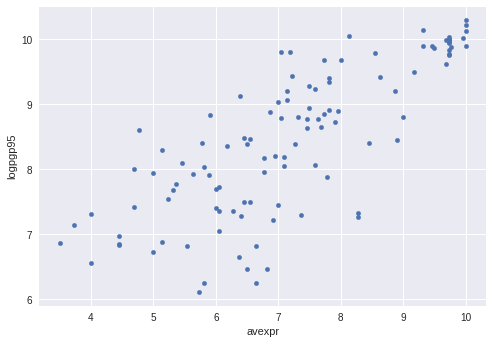

In [23]:
df1.plot(x='avexpr', y='logpgp95', kind='scatter')
plt.show()

뭔가 양의 선형 상관관계가 있어보이지 않나요? (OLS를 돌리면 좋을 것 같지 않아요?)

개인의 권리가 보호받는 제도(1985~1995)를 갖춘 국가일수록 경제 성과(1995)도 높은 모습을 확인할 수 있습니다. (점 하나하나가 개별 국가의 정보를 나타내고 있어요.)

양의 선형관계가 있는 것으로 보이니, OLS 매뉴얼에 따라서 그림을 그려볼 차례인데,

우선 수식으로 모형을 나타내면 아래와 같겠습니다. (질문: 로그를 왜 씌웠을까요?)

$$
{logpgp95}_i = \beta_0 + \beta_1 {avexpr}_i + u_i
$$

여기에서:

- $ \beta_0 $은 직선의 y절편을 의미합니다. (y=ax+b에서 b에 해당하죠.)
- $ \beta_1 $은 직선의 기울기를 의미합니다. 제도가 경제에 미치는 효과(marginal effect)를 살펴보고자 하는 본 연구에서 가장 핵심적인 계수가 되겠습니다. 
- $ u_i $는 모형이 설명하지 못하는 부분을 의미합니다. 제3의 요인이 있을 수 있고, 우연의 요소가 있을 수 있겠습니다.


시각적으로 직선을 그려볼 차례인데, [[AJR(2001)]](https://python-programming.quantecon.org/zreferences.html#acemoglu2001)) 논문에 있는 Figure 2를 그대로 그려보려고 합니다.

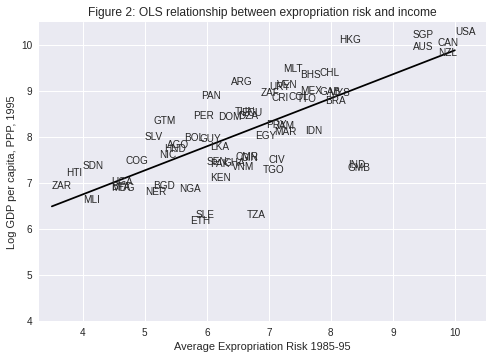

In [47]:
# 그림 그리고자 하는 두 변수의 결측치(없는값)는 제거하도록 합니다. (코드는 영어를 사용한 구글링에서 나온다는 점은 기억하시지요?)
df1_subset = df1.dropna(subset=['logpgp95', 'avexpr'])

# 전세계 데이터가 아닌, 연구자가 기본 샘플로 설정한 국가들만 가지고 그림 그리고자 합니다.
# 이 기본 샘플은 64개국인데, 관심 변수 데이터가 모두 갖춰져 있는 식민지 유경험 국가들입니다.
df1_subset = df1_subset[df1_subset['baseco'] == 1]

X = df1_subset['avexpr']  # 설명변수 X는 제도 지표로 두고,
y = df1_subset['logpgp95'] #피설명변수 y는 log 1인당 GDP로 둡니다.
labels = df1_subset['shortnam'] #국가 이름을 그림 위에 표시할 거예요. 그러기 위해서 일단 국가 이름들의 리스트를 저장해둡니다.


fig, ax = plt.subplots()
ax.scatter(X, y, marker='')   # 점으로 표시를 하지 않는 대신에

for i, label in enumerate(labels):     # 국가 이름들의 리스트에서 하나씩 인덱싱(indexing)하면서 뽑아서
    ax.annotate(label, (X.iloc[i], y.iloc[i]))  # 해당 국가의 X값과 y값이 있는 좌표평면 위의 점에다가 국가 이름을 표시할 겁니다.

# OLS 회귀직선을 그립니다.
ax.plot(np.unique(X),  #X값이 중복되지 않도록 처리해줍니다.
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),  # X값이 존재하는 영역에 대해서 그림을 그려줍니다. 다음 코드에서 요소들을 하나씩 출력해봅시다.
         color='black')

ax.set_xlim([3.3,10.5])  # 보여주고 싶은 x 축의 범위
ax.set_ylim([4,10.5])  # 보여주고 싶은 y 축의 범위


ax.set_xlabel('Average Expropriation Risk 1985-95')                # x 축 설명
ax.set_ylabel('Log GDP per capita, PPP, 1995')                     # y 축 설명
ax.set_title('Figure 2: OLS relationship between expropriation risk and income')    # 그림 제목
plt.show()        # 그려주세요!

In [42]:
np.unique(X)

array([ 3.5      ,  3.7272727,  4.       ,  4.4545455,  4.681818 ,
        5.       ,  5.1363635,  5.2272725,  5.318182 ,  5.3636365,
        5.5454545,  5.6363635,  5.7272725,  5.7727275,  5.818182 ,
        5.8863635,  5.909091 ,  6.       ,  6.0454545,  6.181818 ,
        6.2727275,  6.3863635,  6.409091 ,  6.4545455,  6.5      ,
        6.5454545,  6.6363635,  6.7727275,  6.8636365,  6.909091 ,
        6.9545455,  7.       ,  7.0454545,  7.090909 ,  7.1363635,
        7.2272725,  7.318182 ,  7.4545455,  7.5      ,  7.590909 ,
        7.818182 ,  7.909091 ,  7.9545455,  8.136364 ,  8.272727 ,
        9.318182 ,  9.727273 , 10.       ])

In [39]:
np.polyfit(X, y, 1) # 출력 후 나오는 아래의 각 요소는 1차 함수로 OLS 근사해서 얻은 y절편과 기울기값입니다.

array([0.52210702, 4.66038333])

In [46]:
np.poly1d(np.polyfit(X, y, 1))

poly1d([0.52210702, 4.66038333])

In [45]:
print(np.poly1d(np.polyfit(X, y, 1)))    # OLS 일차함수의 식입니다.

 
0.5221 x + 4.66


In [43]:
np.poly1d(np.polyfit(X, y, 1))(np.unique(X))   # OLS 일차함수에 x값을 대입한 결과들입니다. 굳이 x가 중복되어 매칭에 실패하지 않도록 해주었습니다.

array([6.48775789, 6.60641856, 6.7488114 , 6.98613279, 7.10479336,
       7.27091842, 7.34211476, 7.38957898, 7.43704347, 7.46077558,
       7.55570404, 7.60316826, 7.65063249, 7.67436487, 7.69809698,
       7.73369502, 7.74556121, 7.79302543, 7.81675755, 7.88795389,
       7.93541837, 7.99474853, 8.00661471, 8.03034683, 8.05407894,
       8.07781105, 8.12527528, 8.19647188, 8.24393611, 8.26766822,
       8.29140034, 8.31513245, 8.33886456, 8.36259668, 8.38632879,
       8.43379302, 8.4812575 , 8.55245384, 8.57618596, 8.62365018,
       8.74231101, 8.78977524, 8.81350735, 8.90843607, 8.97963215,
       9.52547154, 9.73906082, 9.8814535 ])

위에서처럼 그림을 그리는 정도는 numpy로도 할 수 있지만,

OLS 회귀분석 결과(표준편차, t값, p값 등)를 출력하기 위해서는 statmodels를 사용합니다.

우선 아래와 같이 상수항을 만들어줍니다. 상수항이 1에 곱해지면 그대로 상수항이 되겠습니다. 일종의 상수항 자리를 새로운 열(column)로 만들어준 겁니다.

In [48]:
df1['const'] = 1

In [50]:
reg1 = sm.OLS(endog=df1['logpgp95'], exog=df1[['const', 'avexpr']], \
    missing='drop')   # 결측치는 제거하기로 하고, statmodels에 있는 OLS 함수를 사용하여 피설명변수와 설명변수/상수항을 각각 특정해줍니다.

In [51]:
results = reg1.fit()  # OLS 회귀분석 결과(표준편차, t값, p값 등)를 저장합니다.

In [52]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           4.16e-24
Time:                        07:41:33   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6261      0.301     15.391      0.0

위의 표를 해석해보자면,

- y절편: $ \hat{\beta}_0 = 4.63 $으로 추정되었습니다.  
- 기울기: $ \hat{\beta}_1 = 0.53 $으로 추정되었습니다.  
- 기울기 $ \hat{\beta}_1 $이 양수로 추정되었다는 점은, 재산권 보호 제도가 잘 확립되어 있을수록 경제도 성장할 것이라는, 양의 상관관계를 뒷받침하는 가설이 됩니다. (그림에서 보셨던 바와 같겠습니다.)

- $ \hat{\beta}_1 $의 p값은 0.000으로 매우 작게 나왔는데, 제도가 GDP에 미치는 영향이 5%의 유의수준에서 의미있다고 볼 수 있게 됩니다. 0.000 얼마의 작은 확률에서 나타나는 차이값은 우연으로 보기에는 내 기준으로는(0.05이하인지) 너무나 작은 확률이기에, 우연을 믿느니 제도가 GDP에 미치는 영향이 없다는 귀무가설을 기각하는 편을 믿겠다는 겁니다. 쉽게 바꾸어 말하면 제도가 GDP에 미치는 (+)의 영향이 존재한다고 믿겠다는 겁니다.

이제 추정치를 얻었으니, 식도 아래와 같이 다시 정리할 수 있게 됩니다.

$$
\widehat{logpgp95}_i = 4.63 + 0.53 \ {avexpr}_i
$$

위와 같은 추정 식을 바탕으로 이제는 일종의 예측도 할 수 있습니다.

제도 수준을 투입하면 log (1인당) GDP가 나옵니다.

가령, 7.07의 제도 수준을 투입하면 8.38의 log 1인당 GDP(1995년)가 나옵니다.

In [55]:
results.predict(exog=[1, 7.07])    # 1은 상수항의 존재를 의미합니다.

array([8.3864198])

모든 x값에 대해서 예측치를 전부 저장한 후 그림으로 그려볼 수도 있겠습니다.

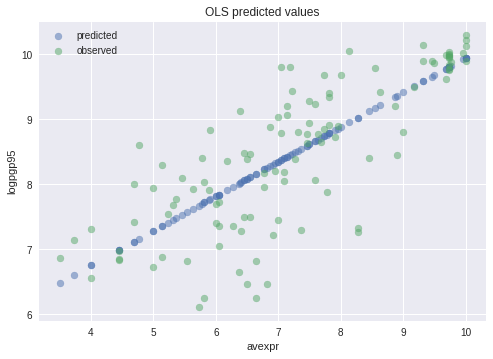

In [56]:
# Drop missing observations from whole sample

df1_plot = df1.dropna(subset=['logpgp95', 'avexpr'])

# Plot predicted values

fix, ax = plt.subplots()
ax.scatter(df1_plot['avexpr'], results.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(df1_plot['avexpr'], df1_plot['logpgp95'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('avexpr')
ax.set_ylabel('logpgp95')
plt.show()